# Analysis of Sorting Algorithms
This notebook analyzes the performance of the implemented sorting algorithms for varying input sizes. It includes visualizations such as power, ratio, and constant tests for algorithm efficiency.

## 1. Setup

### Imports

In [1]:
from src.algorithms import bubble_sort, cocktail_shaker_sort, merge_sort, merge_sort_threshold, radix_sort
from src.utils import (
    create_problems,
    measure_range,
    display_table,
    plot_power_test,
    plot_ratio_test,
    plot_constant_test,
)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import random
from collections.abc import Iterable
from math import log10

### Unit Tests

Please refer to `sorting_test_utils.py` to review the test cases.

In [2]:
# Perform unit testing on all implemented sorting algorithms
!pytest -q tests/test_sorting_algorithms.py

# Uncomment and run the following for a more detailed unit testing
# !pytest -v tests/test_sorting_algorithms.py

....                                                                     [100%]
4 passed in 5.13s


### Sorting Problems

In [3]:
# Small-size problems
sizes = list(range(400, 4001, 400))
max_numbers = [2**31-1]
num_samples = 10
small_size_problems = create_problems(sizes=sizes, max_numbers=max_numbers, num_samples=num_samples)

# Medium-size problems
sizes = list(range(500, 5000, 500)) + list(range(5000, 50001, 5000))
max_numbers = [2**31-1]
num_samples = 50
medium_size_problems = create_problems(sizes=sizes, max_numbers=max_numbers, num_samples=num_samples)

## 2. Theoretical Asymptotic Complexity Analysis

**Bubble Sort** has an average and worst-case time complexity of $\Theta(n^2)$, where $n$ is the size of the input list. This is because it repeatedly compares adjacent elements and swaps them, leading to quadratic comparisons and swaps in the worst case.

**Cocktail Shaker Sort**, also known as bidirectional bubble sort, has the same time complexity as bubble sort. Therefore, its time complexity is also $\Theta(n^2)$ in the average and worst cases. It performs the same number of comparisons but goes through the list in both directions.

**Merge Sort** is a divide-and-conquer algorithm that splits the input into smaller sublists and merges them in sorted order. Its time complexity is $\Theta(n \log n)$, where $n$ is the size of the list. This efficiency comes from recursively dividing the list and merging in linear time.

**Radix Sort** is a non-comparative integer sorting algorithm that sorts numbers digit by digit. Its time complexity is typically considered *quasi-linear*, with respect to the size of the list, i.e., $\Theta(nk)$, where $n$ is the number of elements and $k$ is the number of digits (or the range of the input). Since $k$ is generally much smaller than $n$, Radix Sort often runs in *linear time* for most practical applications when $k$ is small compared to $n$.

## 3. Empirical Analysis
The hypotheses for each algorithm are derived from their theoretical asymptotic complexity analysis. Bubble Sort and Cocktail Shaker Sort are both expected to exhibit quadratic time complexity, Merge Sort is predicted to have a log-linear time complexity, while Radix Sort is expected to show a (quasi-)linear time complexity.

### Bubble Sort

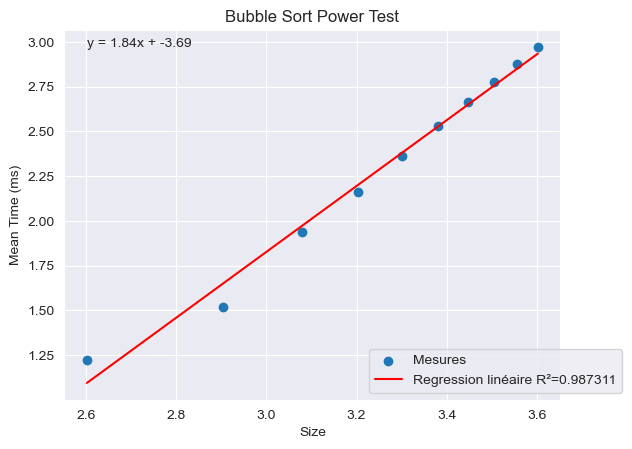

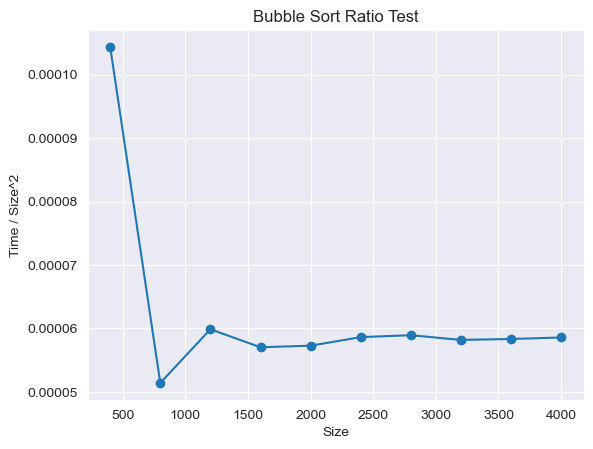

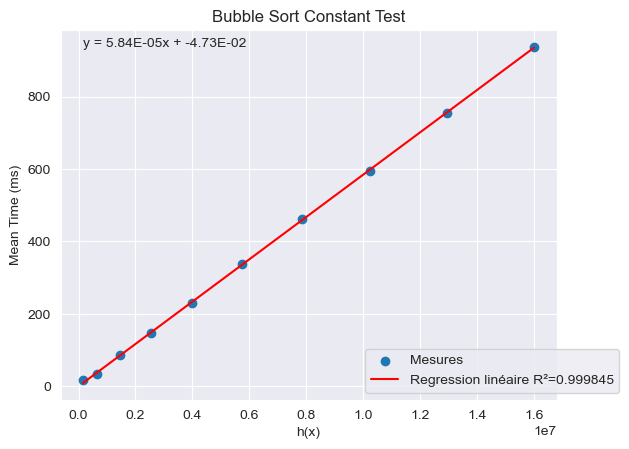

In [4]:
# Measure bubble sort performance on these problems
bubble_sort_measures = measure_range(bubble_sort, small_size_problems)

# Power test: Create data for the power test using log10 transformation
data_power_test = {log10(item.size): log10(item.mean) for item in bubble_sort_measures}
plot_power_test(data=data_power_test, xlabel="Size", ylabel="Mean Time (ms)", title="Bubble Sort Power Test")

# Ratio test: Create data for the ratio test comparing time and size^2
data_ratio_test = {item.size: item.mean / (item.size)**2.0 for item in bubble_sort_measures}
plot_ratio_test(data=data_ratio_test, xlabel="Size", ylabel="Time / Size^2", title="Bubble Sort Ratio Test")

# Constant test: Create data for the constant test using size^2
data_constant_test = {item.size**2: item.mean for item in bubble_sort_measures}
plot_constant_test(data=data_constant_test, xlabel="h(x)", ylabel="Mean Time (ms)", title="Bubble Sort Constant Test")


### Cocktail Shaker Sort

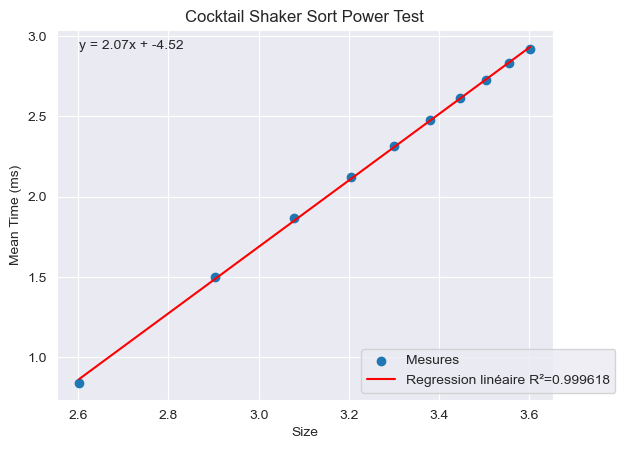

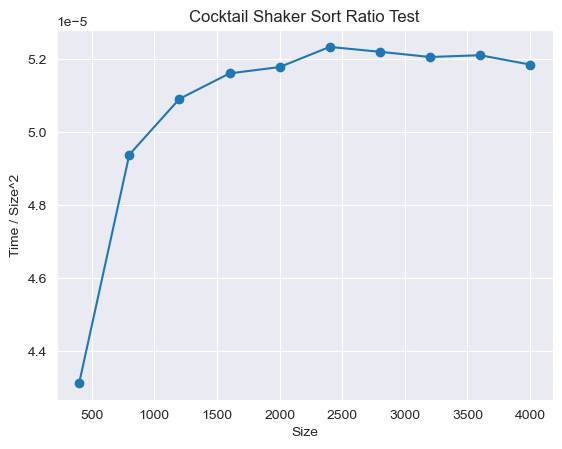

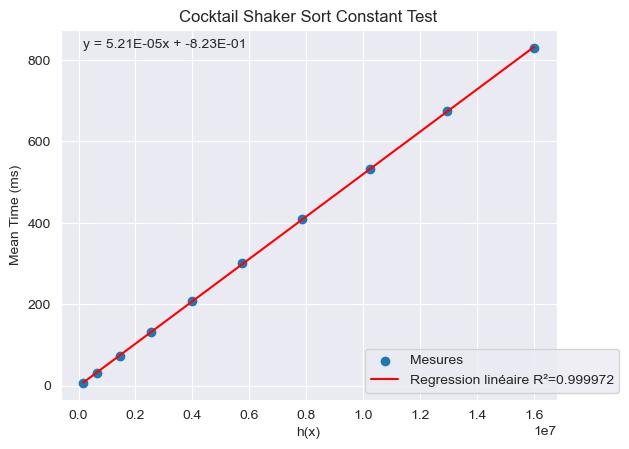

In [5]:
# Measure cocktail shaker sort performance on these problems
cocktail_shaker_sort_measures = measure_range(cocktail_shaker_sort, small_size_problems)

# Power test: Create data for the power test using log10 transformation
data_power_test = {log10(item.size): log10(item.mean) for item in cocktail_shaker_sort_measures}
plot_power_test(data=data_power_test, xlabel="Size", ylabel="Mean Time (ms)", title="Cocktail Shaker Sort Power Test")

# Ratio test: Create data for the ratio test comparing time and size^2
data_ratio_test = {item.size: item.mean / (item.size)**2.0 for item in cocktail_shaker_sort_measures}
plot_ratio_test(data=data_ratio_test, xlabel="Size", ylabel="Time / Size^2", title="Cocktail Shaker Sort Ratio Test")

# Constant test: Create data for the constant test using size^2
data_constant_test = {item.size**2: item.mean for item in cocktail_shaker_sort_measures}
plot_constant_test(data=data_constant_test, xlabel="h(x)", ylabel="Mean Time (ms)", title="Cocktail Shaker Sort Constant Test")


### Merge Sort

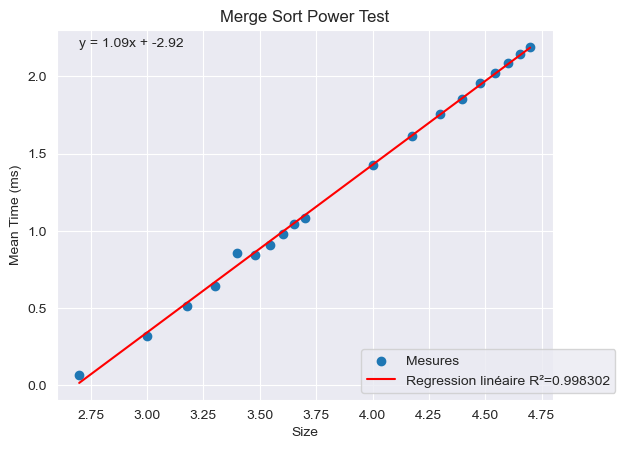

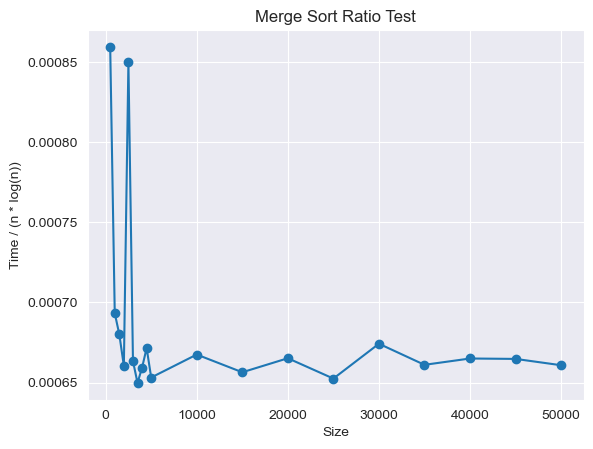

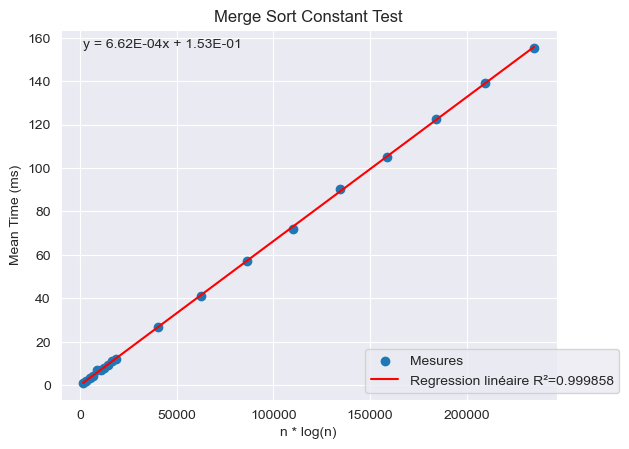

In [6]:
# Measure merge sort performance on these problems
merge_sort_measures = measure_range(merge_sort, medium_size_problems)

# Power test: Create data for the power test using log10 transformation
data_power_test = {log10(item.size): log10(item.mean) for item in merge_sort_measures}
plot_power_test(data=data_power_test, xlabel="Size", ylabel="Mean Time (ms)", title="Merge Sort Power Test")

# Ratio test: Create data for the ratio test comparing time and n * log(n)
data_ratio_test = {item.size: item.mean / (item.size * log10(item.size)) for item in merge_sort_measures}
plot_ratio_test(data=data_ratio_test, xlabel="Size", ylabel="Time / (n * log(n))", title="Merge Sort Ratio Test")

# Constant test: Create data for the constant test using n * log(n)
data_constant_test = {item.size * log10(item.size): item.mean for item in merge_sort_measures}
plot_constant_test(data=data_constant_test, xlabel="n * log(n)", ylabel="Mean Time (ms)", title="Merge Sort Constant Test")

### Radix Sort

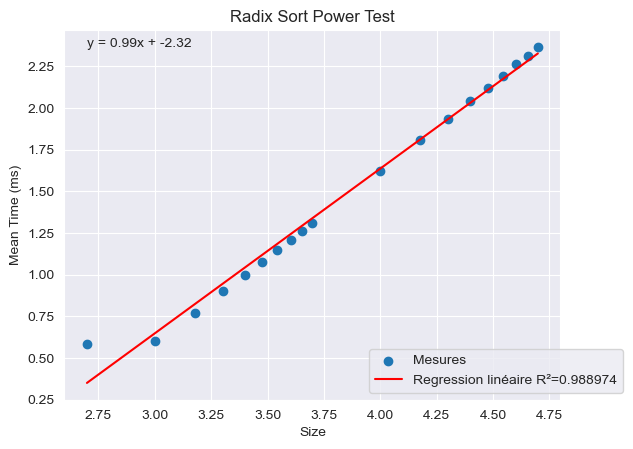

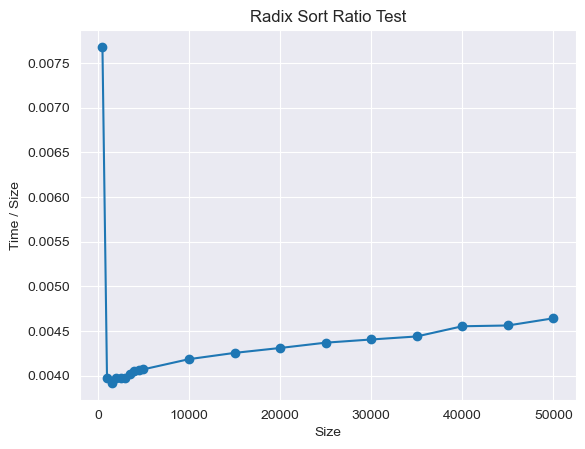

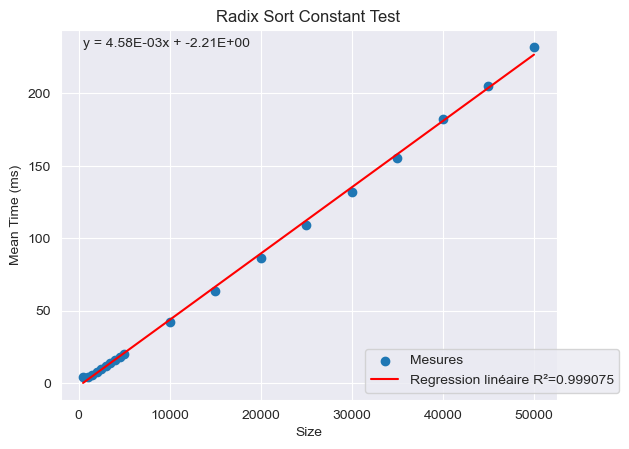

In [7]:
# Measure radix sort performance on these problems
radix_sort_measures = measure_range(radix_sort, medium_size_problems)

# Power test: Create data for the power test using log10 transformation
data_power_test = {log10(item.size): log10(item.mean) for item in radix_sort_measures}
plot_power_test(data=data_power_test, xlabel="Size", ylabel="Mean Time (ms)", title="Radix Sort Power Test")

# Ratio test: Create data for the ratio test comparing time and n (linear time complexity)
data_ratio_test = {item.size: item.mean / item.size for item in radix_sort_measures}
plot_ratio_test(data=data_ratio_test, xlabel="Size", ylabel="Time / Size", title="Radix Sort Ratio Test")

# Constant test: Create data for the constant test using n
data_constant_test = {item.size: item.mean for item in radix_sort_measures}
plot_constant_test(data=data_constant_test, xlabel="Size", ylabel="Mean Time (ms)", title="Radix Sort Constant Test")


### Observations
The hypotheses formulated based on our theoretical analysis have been confirmed through the empirical evaluation of all the implemented sorting algorithms. Specifically, in the power tests, the plots consistently show a line of the form $y=ax+b$, where the value of $a$ indicates that the execution time grows approximately like $n^a$. For the ratio tests, all plots converge to a horizontal line, confirming that the time complexity of each algorithm stabilizes as expected with respect to the ratio of time to $n^2$ for quadratic algorithms, and to $n\log(n)$ for Merge Sort and to $n$ for Radix Sort. Finally, the constant tests display a clear linear relationship, further validating that all implemented algorithms adhere to their respective theoretical time complexities.